### Shot Map Tutorial

This notebook is inspired from @sonofacorner in Twitter. This will create a heatmap of the shot locations.

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from matplotlib.patheffects import Stroke , Normal, withStroke

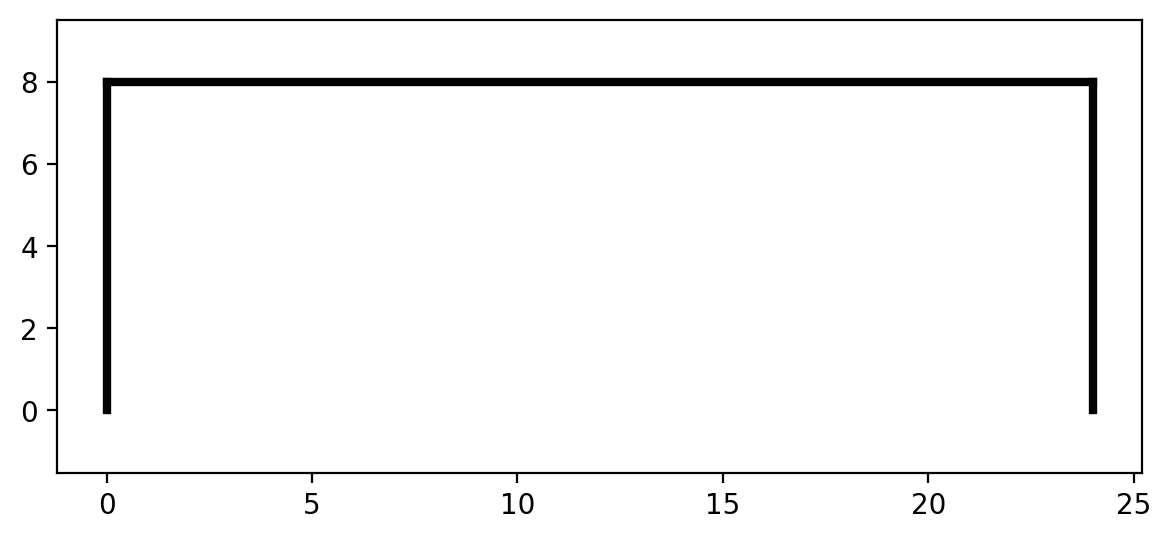

In [2]:
# drawing the goalpost

fig, ax = plt.subplots(figsize=(7,3), dpi = 200)
ax.axis('equal')

width = 24
height = 8

ax.plot([0,0],[0,height],color='black', lw=3)
ax.plot([width,width],[0,height],color='black', lw=3)

ax.plot([0,width],[height,height], color='black', lw=3)

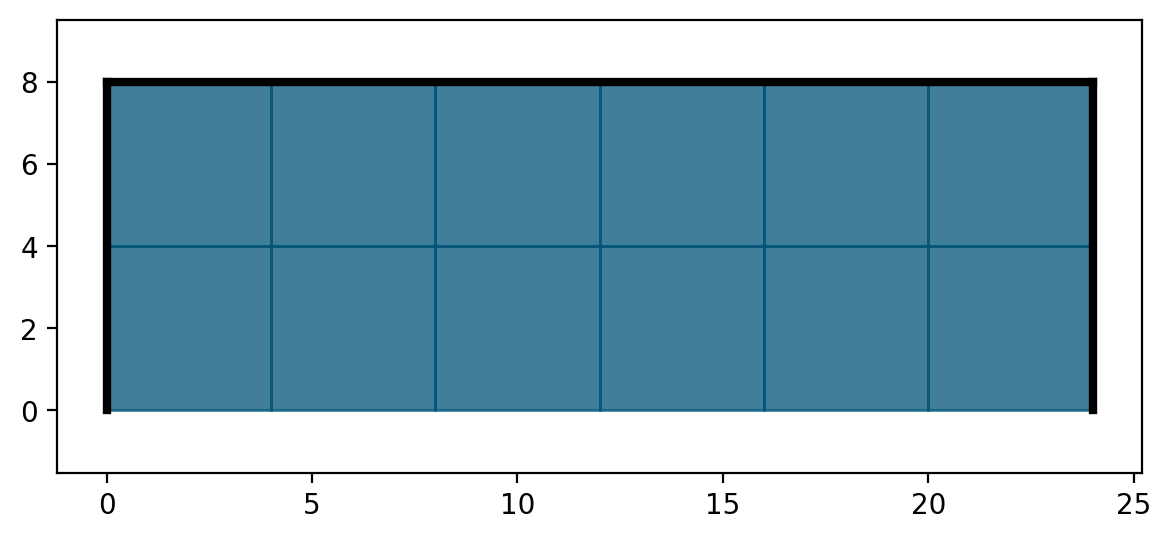

In [3]:
# splitting the goalpost into different small areas

fig, ax = plt.subplots(figsize=(7,3), dpi = 200)
ax.axis('equal')

width = 24
height = 8

ax.plot([0,0],[0,height],color='black', lw=3)
ax.plot([width,width],[0,height],color='black', lw=3)

ax.plot([0,width],[height,height], color='black', lw=3)


#####NEW#####
# a 6x2 grid
increment_x = int(width/6)
increment_y = int(height/2)

x = 0
while x < width:
    for y in range(0,height,increment_y):
        rect = patches.Rectangle(
        (x,y), # bottom left starting position
        increment_x, # width
        increment_y, # height 
        ec = '#005377',
        fc = '#005377',
        alpha = 0.75,
        zorder=-1
        )
        ax.add_patch(rect)
    x = x+increment_x

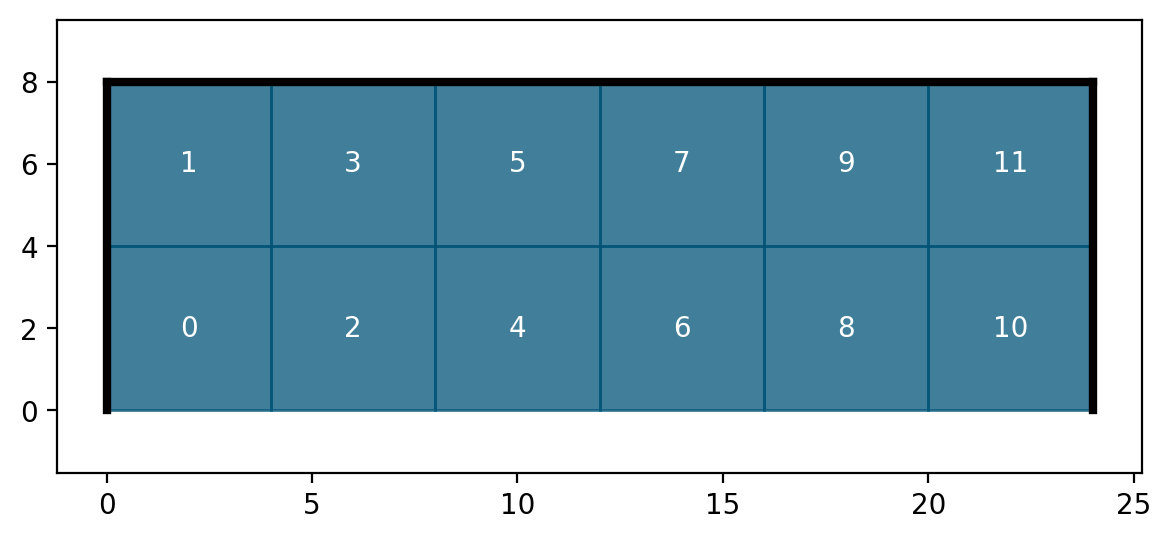

In [4]:
# adding annotation

fig, ax = plt.subplots(figsize=(7,3), dpi = 200)
ax.axis('equal')

width = 24
height = 8

ax.plot([0,0],[0,height],color='black', lw=3)
ax.plot([width,width],[0,height],color='black', lw=3)

ax.plot([0,width],[height,height], color='black', lw=3)


#####NEW#####
# a 6x2 grid
increment_x = int(width/6)
increment_y = int(height/2)

i=0
x = 0
while x < width:
    for y in range(0,height,increment_y):
        rect = patches.Rectangle(
        (x,y), # bottom left starting position
        increment_x, # width
        increment_y, # height 
        ec = '#005377',
        fc = '#005377',
        alpha = 0.75,
        zorder=-1
        )
        ax.add_patch(rect)
        
        #########NEW######
        label_ = ax.text(
                    x = x+increment_x/2,
                    y = y+increment_y/2,
                    s = f'{i}',
                    color = 'white',
                    va = 'center',
                    ha = 'center'
        )
        i += 1
        
    x = x+increment_x

    
    

In [6]:
# reading the csv file containing the sample data

df = pd.read_csv('shot_map_tutorial_sample.csv')
df

,Unnamed: 0,x,y,teamId,playerId,playerName,matchId,type,date,team_name
0,2,1.605159,0.042467,8678,343316,Emiliano Marcondes,3619437,goal,8/6/2021 13:45,AFC Bournemouth
1,3,1.564815,0.322751,8678,591734,Dominic Solanke,3619437,shotBlocked,8/6/2021 13:45,AFC Bournemouth
2,11,1.685847,0.032275,8678,532743,Philip Billing,3619437,goal,8/6/2021 13:45,AFC Bournemouth
3,15,0.233466,0.022083,8678,674014,David Brooks,3619437,shotOT,8/6/2021 13:45,AFC Bournemouth
4,18,1.625331,0.322751,8678,532743,Philip Billing,3619437,shotBlocked,8/6/2021 13:45,AFC Bournemouth
...,...,...,...,...,...,...,...,...,...,...
2259,12131,1.060516,0.086633,8678,469202,Kieffer Moore,3620517,shotOT,4/26/2022 13:45,AFC Bournemouth
2260,12132,1.363095,0.225926,8678,591734,Dominic Solanke,3620517,shotOT,4/26/2022 13:45,AFC Bournemouth
2261,12133,1.706019,0.171568,8678,469202,Kieffer Moore,3620517,goal,4/26/2022 13:45,AFC Bournemouth
2262,12134,1.544643,0.139293,8678,466672,Jefferson Lerma,3620517,shotOT,4/26/2022 13:45,AFC Bournemouth


Our dataset is composed of the following:

|column| description|
|--|--|
|x| the x-axis location of the shot on a scale of 0 to 2.|
|y| the y-axis location of the shot on a scale of 0 to 0.66.|
|teamId| the team's unique id.|
|playerId| the player's unique id.|
|playerName| the player's name.|
|matchId| the match's unique id.|
|type| the shot type (blocked, on target, goal, etc.).|
|date| the date in which the match occured.|
|team_name| the football club's name.|


In [7]:
# cleaning the data
# keeping the shots that were either on target or resulted in goal
# scaling the co ordinates to our goal post

df = df[df['type'].isin(['goal','shotOT'])].copy()

df['x'] = [((x*24)/2) for x in df['x']]
df['y'] = [((y*8)/0.66666) for y in df['y']]